In [226]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [227]:
df=pd.read_csv("https://github.com/dsrscientist/dataset1/raw/master/titanic_train.csv")

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [229]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Above we can see that 38% are the survived.We can also see that the passenger ages range from 0.4 to 80.On top of that we can already detect some featres,that contain missing values,like the'Age'feature

In [230]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


From the above table, we can note few things. First of all,that we need to convert a lot of featured into numeic ones later on,so that the machine learning algorithm can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values, that we need to deal with.

In [231]:
total=df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


The Embarked feature has only 2 missing values,which can easily be filled.It will much more tricky,to deal with the 'Age'feature,which has 177 missing values.The 'Cabin' feature needs further investigation,but it looks like that we might want to drop it from the dataset, since 77% of it are missing.

In [232]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above you can see the 11 feature+ the target variable(survived).
What features could contibute to a high survival rate?

It would make sense if everything except 'PassengerId','Ticket' and 'Name'would be correlated with a high surviva rate.

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


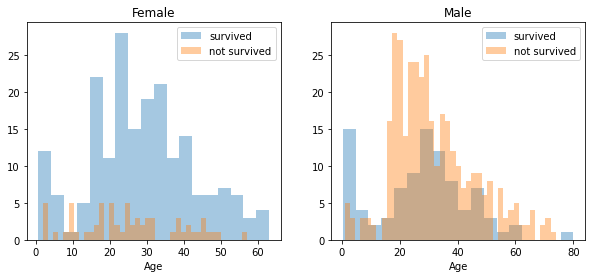

In [233]:
#1 Age and Sex:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_=ax.set_title('Male')

we can see that men have a high probabliy of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
For men the probablity of survival is very low between the age of 5 and 18,but that is not true for women.Another thing to note is that infants also have a little bit higher probablity of surviva.
Since ther seem to be certain ages,which have increased odds of survival and because we want every feature to be roughly on the same scale, we will create age groups later on.


C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


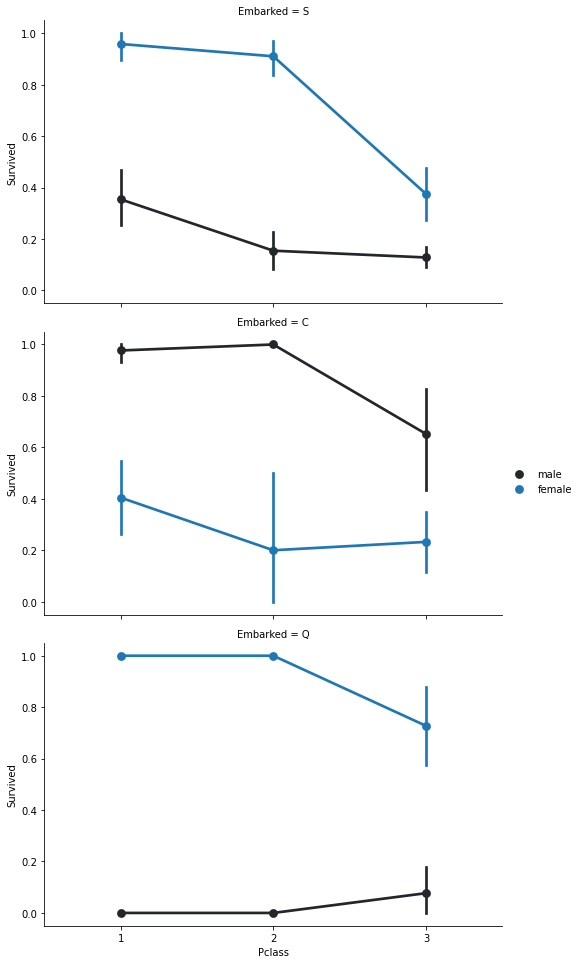

In [234]:
#3. Embarked,Pclass and Sex:
FacetGrid=sns.FacetGrid(df,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

Embarked seems to be correlated with survival,depending on the gender.
Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C.Men have a high survival probabilit if they are on port C,but a low probability if they are on port Q or S.
Pclass also seems to be correlated with survival. We will generate another plot of it below.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

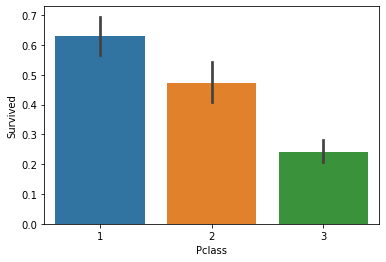

In [235]:
#4. Pclass
sns.barplot(x='Pclass',y='Survived', data=df)

Here we see clearly,that Pclass is contributing to a persons chance of survival, especiay if this person is in class 1. We will create another pclass plot below.

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


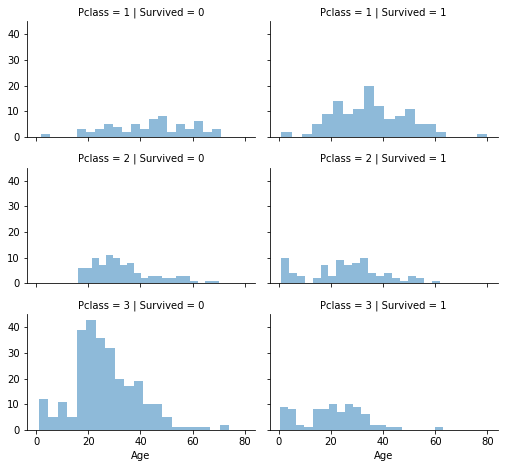

In [236]:
grid=sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age' , alpha=.5, bins=20)
grid.add_legend();

In [237]:
#5. SibSp and Parch:
#SibSp and Parch woul make more sense as a combined feature, that shows the total number of relatives, a perso has on the Titanic.I will create it below and also a feature that sows if someone is not alone.
data=[df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


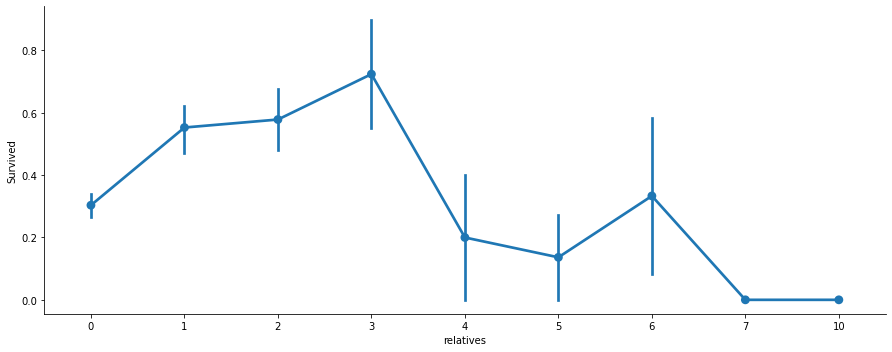

In [238]:
axes=sns.factorplot('relatives','Survived',data=df, aspect=2.5)

Here we can see that we had a high probablity of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3(except for some cases with 6 relatives).

In [239]:
#Data preprocessing
#First i will drop 'PassengerId' from the dataset because it does not contribute to a persons survival probablity
df=df.drop(['PassengerId'],axis=1)

In [240]:
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data=[df]
for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna("U0")
    dataset['Deck']=dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)
df=df.drop(['Cabin'],axis=1)

Age:Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers,which are computed based on the mean age value in regards to the standard deviation and is_null.

In [241]:
data=[df]
for dataset in data:
    mean=df["Age"].mean()
    std=df["Age"].std()
    is_null=dataset["Age"].isnull().sum()
    #compute random numbers between the mean, std and is_null
    rand_age=np.random.randint(mean-std, mean+std, size=is_null)
    #fill NaN values in Age column with random values generated
    age_slice=dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset["Age"]=age_slice
    dataset["Age"]=df["Age"]
df["Age"].isnull().sum()

0

In [242]:
#Embarked: Since the Embarked feature has only 2 missing values,we will fill these with the most common one.
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [243]:
common_value='S'
data=[df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

Converting Features:

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


Above you can see that 'Fare' is a float and we have to deal with 4 categorical features:Name,Sex,Ticket and Embarked.

In [245]:
#Converting "Fare" from float64 to int64, using the "astype()" function
data=[df]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [246]:
#Name:We will use the Name feature to extract the Titles from the Name,so that we can build a new feature out of that.
data=[df]
titles={"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in data:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' ], 'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title']=dataset['Title'].replace('Ms', 'Miss')
    dataset['Title']=dataset['Title'].replace('Mme', 'Mrs')
    #convert titles into numbers
    dataset['Title']=dataset['Title'].map(titles)
    #filling NaN with 0, to get safe
    dataset['Title']=dataset['Title'].fillna(0)
    df=df.drop(['Name'], axis=1)

In [247]:
#Sex: Convert 'Sex' feature into numeric
genders={"male":0, "female":1}
data=[df]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [248]:
#Ticket:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [249]:
#Since the Ticket attribute has 681 unique tickets,it will be a bit tricky to convert them into usefu categories.So we will drop it
df=df.drop(['Ticket'],axis=1)

In [250]:
#Embarked:convert 'Embarked' feature into numeric
ports={"S":0,"C":1,"Q":2}
data=[df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)


In [251]:
#Creating Categories:We will now create categories with in the following features:
#Age:Now we need to convert the 'age' feature.First we will convert it from float into integer.Then we will create the new 'Age Group' variable,by caegorizing every age into a group.
data=[df]
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11, 'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=66),'Age']=6
    dataset.loc[ dataset['Age']>66, 'Age']=6
#let's see how it's distributed
df['Age'].value_counts()

6    172
4    156
5    145
3    134
2    117
1     99
0     68
Name: Age, dtype: int64

Fare:For the Fare feature we need to do the same as with the 'Age' feature.But it is not that easy,because if we cut the range of the fare values into a few equally big categories, 80% of the values would fal into the first category.Fortunnately,we can use sklearn "qcut()" function,that we can use to see,how we can form the categories.

In [252]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,3,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [253]:
data=[df]
for datset in data:
    dataset.loc[ dataset['Fare']<=7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454), 'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31), 'Fare']=2
    dataset.loc[(dataset['Fare']>31)&(dataset['Fare']<=99), 'Fare']=3
    dataset.loc[(dataset['Fare']>99)&(dataset['Fare']<=250), 'Fare']=4
    dataset.loc[dataset['Fare']>250, 'Fare']=5
    dataset['Fare']=dataset['Fare'].astype(int)

Creating new features:I will add two new features to the dataset,that i compute out of other features

In [254]:
#1.Age time Class
data=[df]
for dataset in data:
    dataset['Age_Class']=dataset['Age']*dataset['Pclass']

In [255]:
#Fare per Person
for dataset in data:
    dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [256]:
y=df.Survived
x=df.drop('Survived', axis=1)

In [257]:
#Split train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [258]:
#Stochastic Gradient Descent(SGD)
sgd=linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
sgd.score(x_train,y_train)
acc_sgd=round(sgd.score(x_train,y_train)*100,2)

In [259]:
#Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)

In [260]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc_logreg=round(logreg.score(x_train,y_train)*100,2)

In [261]:
#K Nearest Neighbor
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_knn=round(knn.score(x_train,y_train)*100,2)

In [262]:
#Gaussian Naive Bayes
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
acc_gaussian=round(gaussian.score(x_train,y_train)*100,2)

In [263]:
#Perceptron
perceptron=Perceptron(max_iter=5)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
acc_perceptron=round(perceptron.score(x_train,y_train)*100,2)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [264]:
#Linear Support Vector Machine
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
acc_linear_svc=round(linear_svc.score(x_train,y_train)*100,2)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [265]:
#Decision Tree
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
acc_decision_tree=round(decision_tree.score(x_train,y_train)*100,2)

In [266]:
#Which is the best Model?
results=pd.DataFrame({'Model':['Support Vector Machine','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron','Stochastic Gradient Decent','Decision Tree'],
                      'Score':[acc_linear_svc,acc_knn,acc_logreg,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,acc_decision_tree]})
result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.42,Random Forest
92.42,Decision Tree
86.80,KNN
82.87,Logistic Regression
82.30,Support Vector Machine
81.04,Stochastic Gradient Decent
77.95,Naive Bayes
67.56,Perceptron


As we can see,the Random Forest Classifier goes on the first place.But first,let us check,how random-forest performs,when we use cross validation.

In [267]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,x_train,y_train,cv=10,scoring="accuracy")
print("Scores:",scores)
print("Mean:",scores.mean())
print("Standard Deviation:",scores.std())

Scores: [0.80555556 0.80555556 0.81690141 0.87323944 0.76056338 0.83098592
 0.8028169  0.76056338 0.78873239 0.85915493]
Mean: 0.8104068857589984
Standard Deviation: 0.035118640120558625


In [268]:
#Feature Importance
importances=pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.210
Sex,0.171
Age_Class,0.098
Deck,0.081
Pclass,0.073
Age,0.073
Fare,0.065
Embarked,0.059
relatives,0.056


<AxesSubplot:xlabel='feature'>

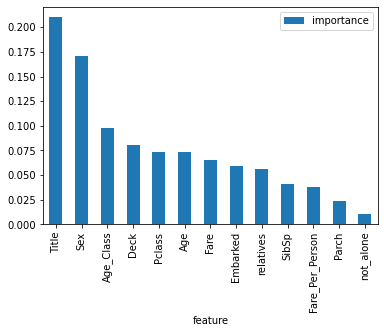

In [269]:
importances.plot.bar()

#Hyperparameter Tuning
param_grid={"criterion":["gini","entropy"],"min_samples_leaf":[1,5,10,25,50,70],"min_samples_split":[2,4,10,12,16,18,25,35],"n_estimators":[100,400,700,1000,1500]}
from sklearn.model_selection import GridSearchCV,cross_val_score
rf=RandomForestClassifier(n_estimators=100,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
clf=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
clf.fit(x_train,y_train)
clf.bestparams

I will put this code into a markdown cell and not into a code cell,because it takes a long time to run it.where as i wil use numbers by myself to get best output.

In [272]:
#Test new parameters
random_forest=RandomForestClassifier(criterion="gini",min_samples_leaf=1,min_samples_split=10,n_estimators=100,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
random_forest.fit(x_train,y_train)
print("oob score:", round(random_forest.oob_score_,4)*100, "%")

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


oob score: 82.72 %


Confusion Matrix:

In [274]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
prediction=cross_val_predict(random_forest,x_train,y_train,cv=3)
confusion_matrix(y_train,prediction)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

array([[386,  53],
       [ 83, 190]], dtype=int64)

Precision and Recall:

In [275]:
from sklearn.metrics import precision_score,recall_score
print("Precision:",precision_score(y_train,prediction))
print("Recall:",recall_score(y_train,prediction))

Precision: 0.7818930041152263
Recall: 0.6959706959706959


Our model predicts 79% of the time, a passengers survival correctly(precision).The recall tells us that it predicted the survival of 70% of the people who actually survived.

F-Score:

In [276]:
from sklearn.metrics import f1_score
f1_score(y_train,prediction)

0.7364341085271318

Precision Recall Curve

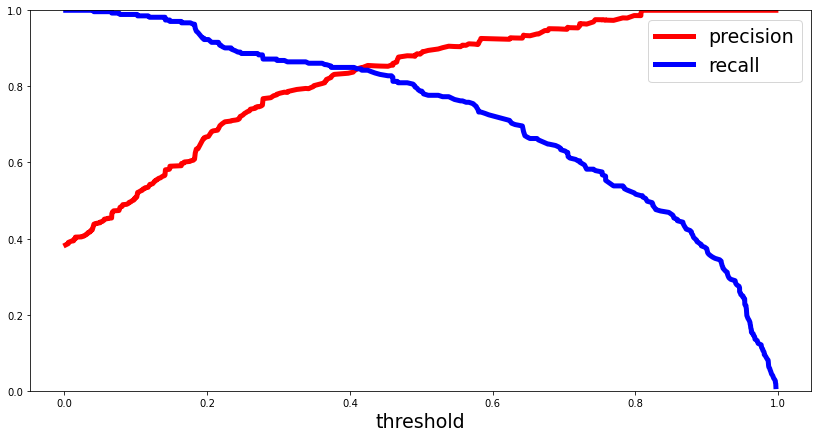

In [278]:
from sklearn.metrics import precision_recall_curve
#getting the probablities of our predictions
y_scores=random_forest.predict_proba(x_train)
y_scores=y_scores[:,1]
precision, recall, threshold=precision_recall_curve(y_train,y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-",label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0,1])
plt.figure(figsize=(14,7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

We are now able to choose a threshold, that gives us the best precision/recall tradeoff for our current machine learning problem

ROC AUC Curve

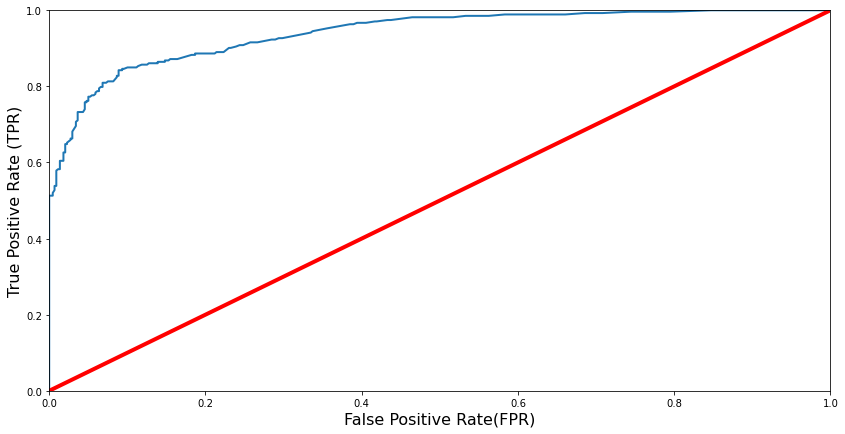

In [279]:
from sklearn.metrics import roc_curve
#compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds=roc_curve(y_train, y_scores)
#plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'r', linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate(FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    
plt.figure(figsize=(14,7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middle represents a purely random classifier(eg. a coin flip) and therefore our classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

ROC AUC Score

In [280]:
from sklearn.metrics import roc_auc_score
r_a_score=roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9400068420569561


Nice!I think that score is good

In [292]:
data={'Pclass':3,'Sex':0,'Age':2,'SibSp':1,'Parch':0,'Fare':0,'Embarked':0,'relatives':1,'not_alone':0,'Deck':8,'Title':1,'Age_Class':6,'Fare_Per_Person':0}
df=pd.DataFrame(data,index=[0])


Predict Survival

In [293]:
new_pred=rf.predict(df)
print(new_pred)

[0]


In [291]:
#save model using Joblib
rf=RandomForestClassifier()
rf.fit(x,y)
import joblib
joblib.dump(rf,'model_joblib_rf')
model=joblib.load('model_joblib_rf')
model.predict(df)

array([0], dtype=int64)